In [22]:
# !/usr/local/bin/python3.11 -m pip install ipympl

In [23]:
%matplotlib widget

In [24]:
from app.core.PoseHelper import PoseHelper
from app.core.SugesstionBuilder import SuggestionBuilder
import mediapipe as mp

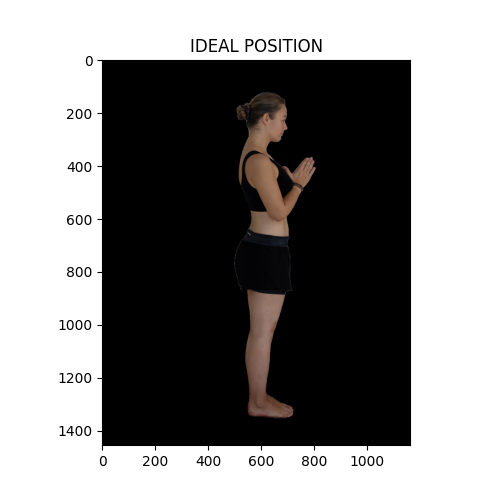

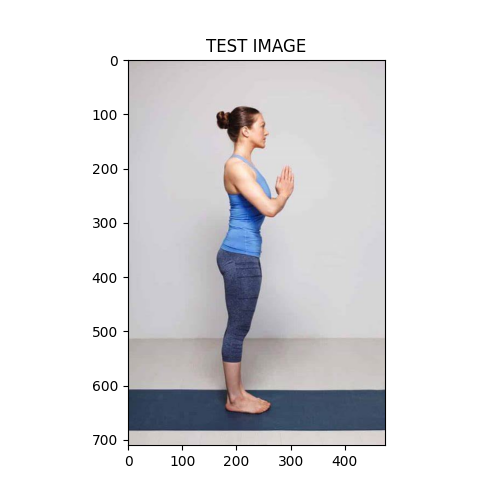

In [25]:
ideal = PoseHelper("app/data/suryanamaskarsteps/00.pranamasana_new_side_view.png")
# app/media/Pranamasana-train.png')
my_pose = PoseHelper("app/media/00.a_pranamasana_side_view.jpeg")
# app/media/pranamasana_wrong.jpg")
ideal.display_img([5, 5], "IDEAL POSITION")
my_pose.display_img([5, 5], "TEST IMAGE")

Landmarks are extracted:
NOSE:
[255.59083342552185, 138.45034405589104, -35.983498737215996]
LEFT_EYE_INNER:
[247.71200215816498, 124.95200097560883, -21.472439870238304]
LEFT_EYE:
[246.16206443309784, 124.79937642812729, -21.735531628131866]
LEFT_EYE_OUTER:
[244.6661456823349, 124.69696372747421, -21.679752163589]
RIGHT_EYE_INNER:
[246.84490156173706, 124.60826247930527, -58.42631658911705]
RIGHT_EYE:
[245.16356098651886, 124.45047497749329, -58.73211921751499]
RIGHT_EYE_OUTER:
[242.74169147014618, 124.166279733181, -58.81280864775181]
LEFT_EAR:
[228.14942049980164, 128.48826497793198, 46.55405071377754]
RIGHT_EAR:
[225.01834005117416, 128.57696622610092, -117.90540987253189]
MOUTH_LEFT:
[250.1135298013687, 148.77347022294998, -4.39345127530396]
MOUTH_RIGHT:
[248.9457085132599, 148.50783199071884, -54.28417441248894]
LEFT_SHOULDER:
[213.8763615489006, 199.63948875665665, 143.22290521860123]
RIGHT_SHOULDER:
[205.6626945734024, 199.89915996789932, -186.53445428609848]
LEFT_ELBOW:
[253.2

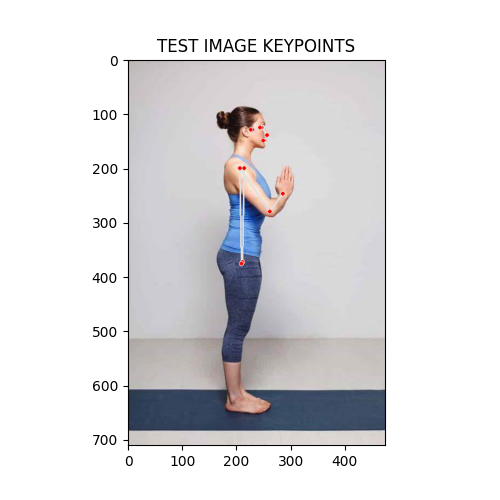

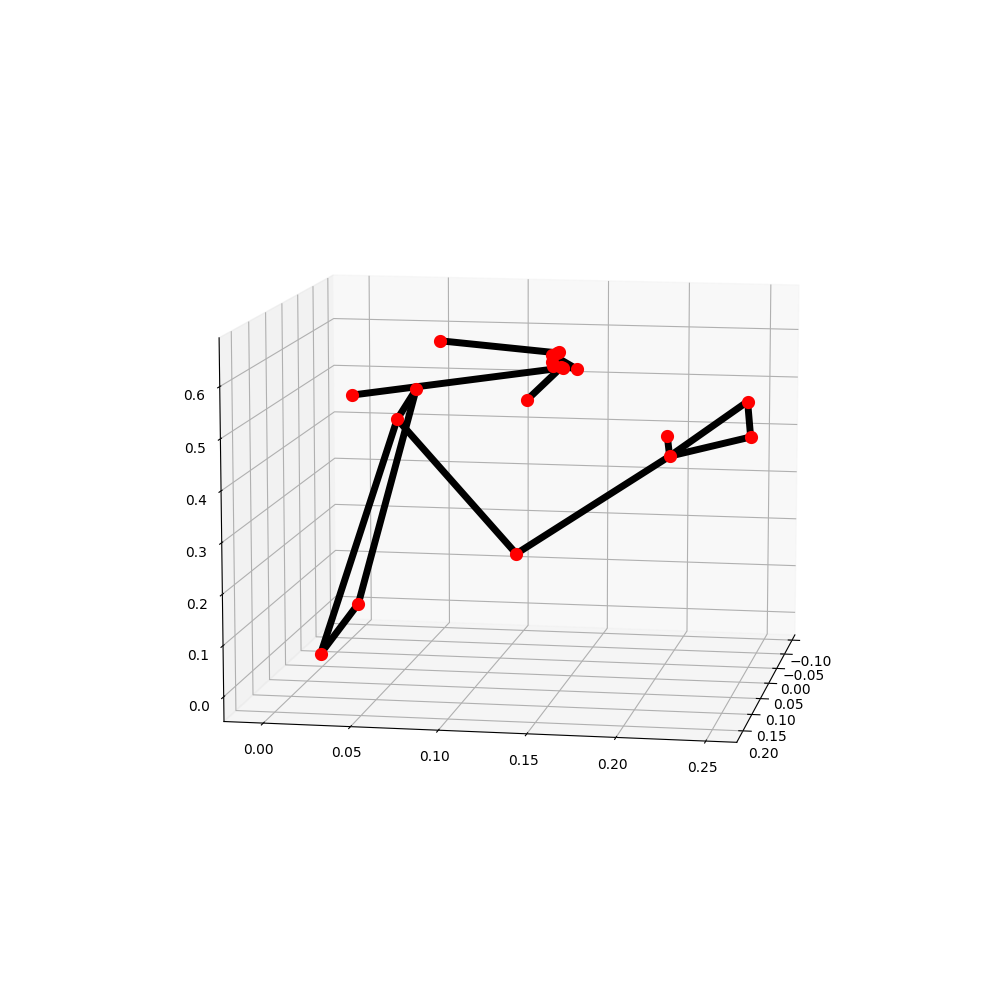

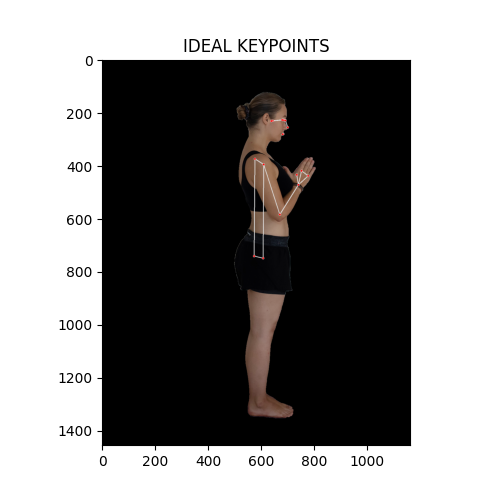

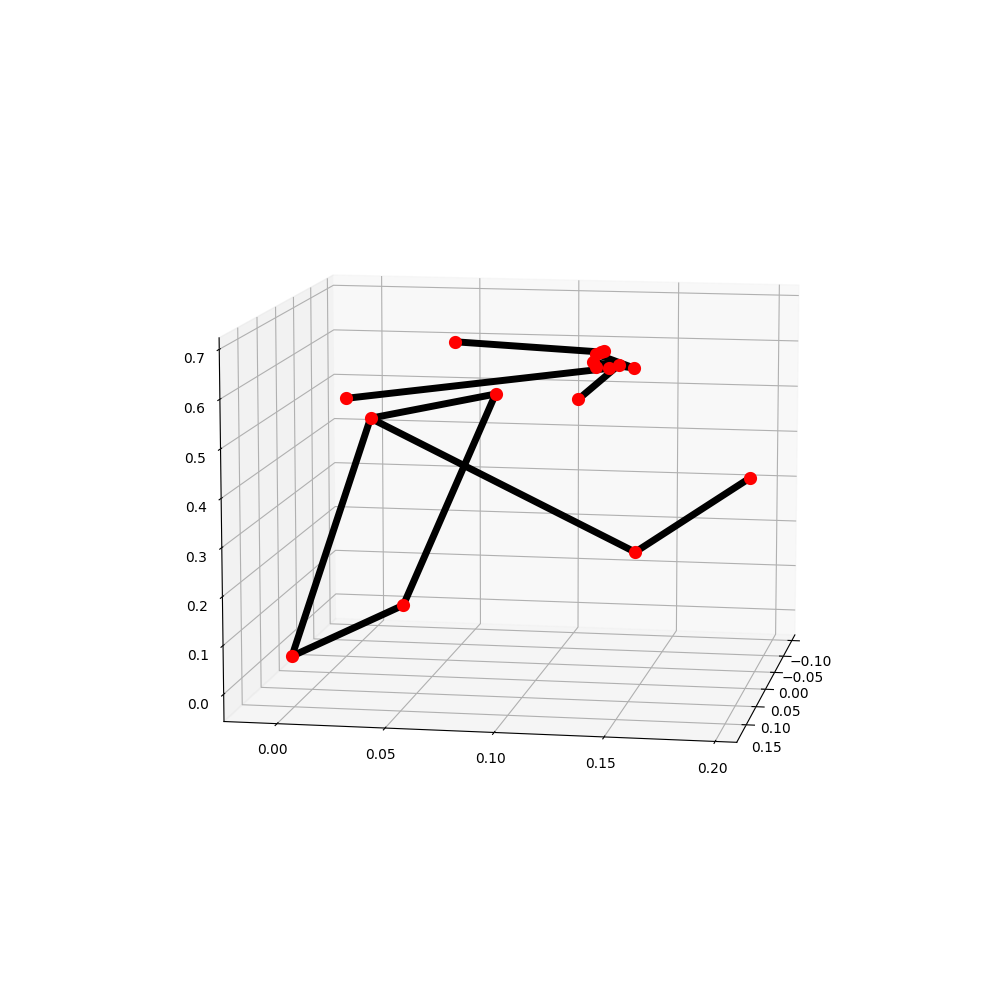

In [26]:
print("Landmarks are extracted:")
ideal.detect_keypoints(verbose=False)
my_pose.detect_keypoints(verbose=True)
my_pose.plot_keypoints2d(fig_title="TEST IMAGE KEYPOINTS")
ideal.plot_keypoints3d()
ideal.plot_keypoints2d(fig_title="IDEAL KEYPOINTS")
my_pose.plot_keypoints3d()

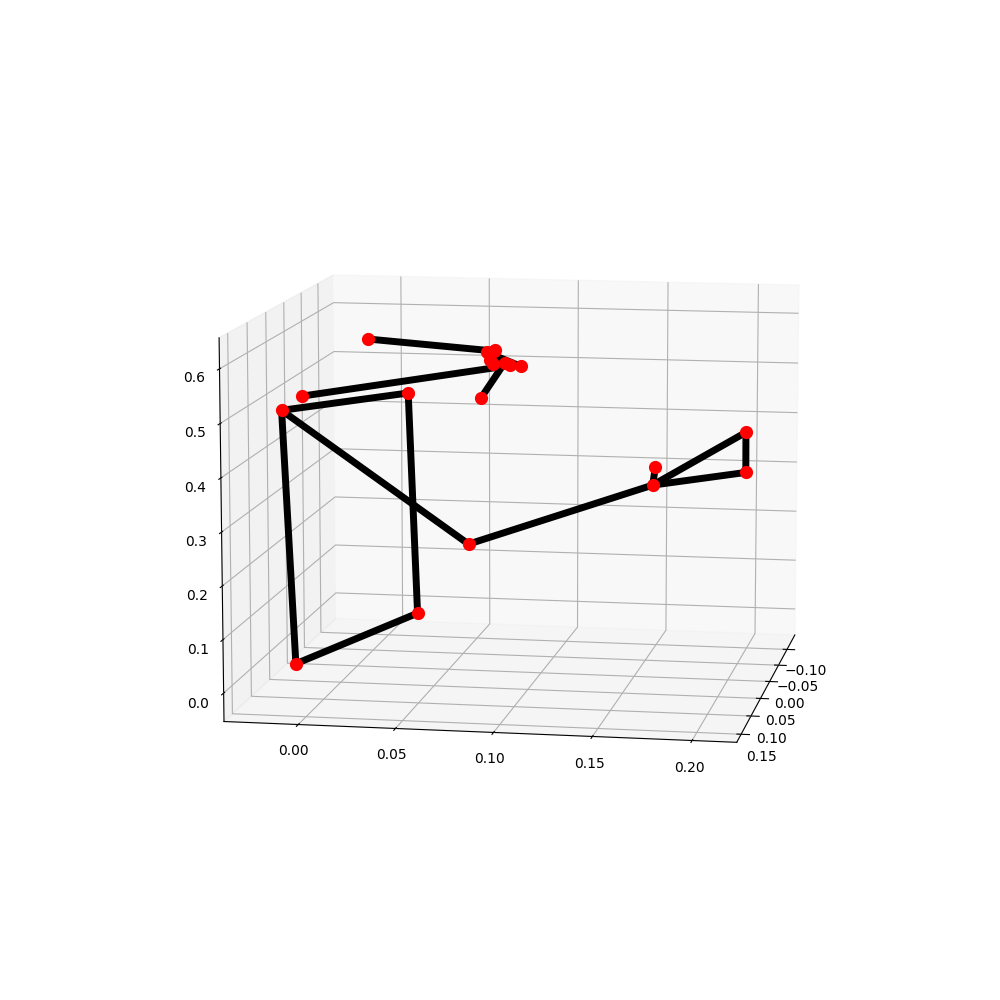

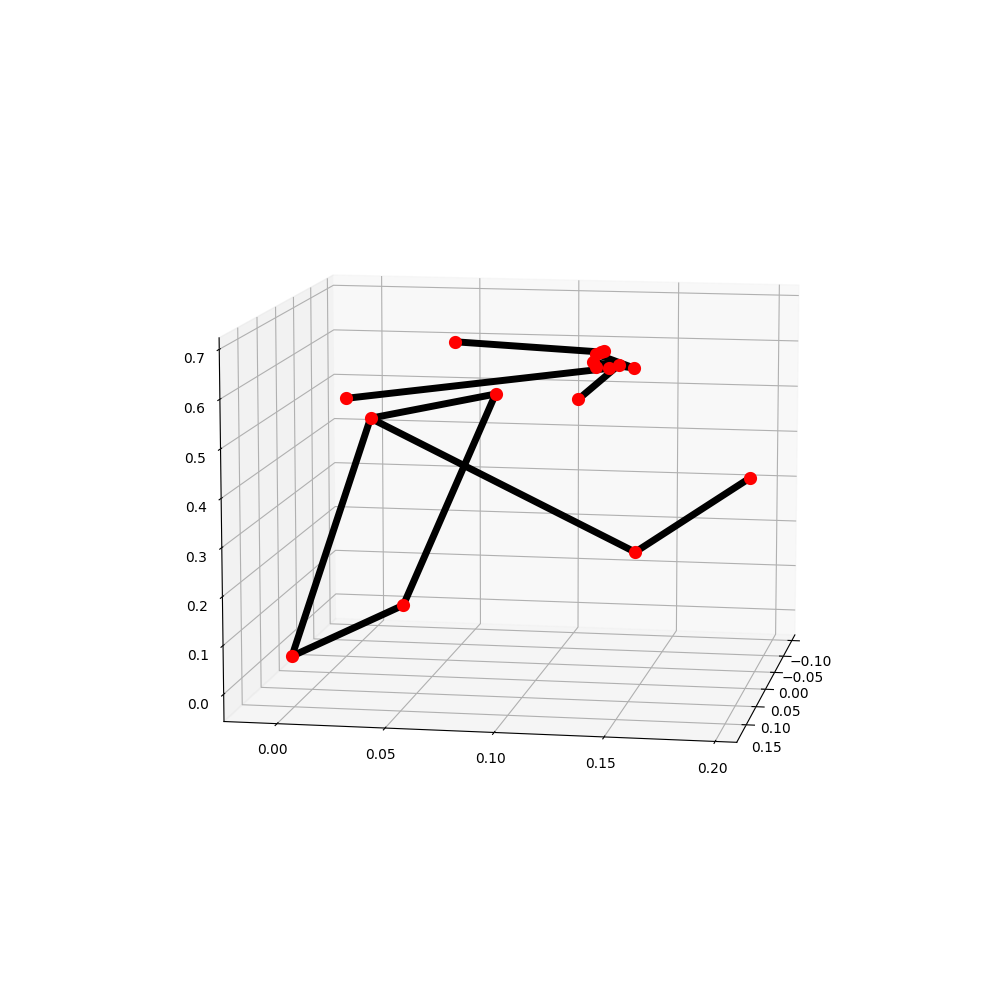

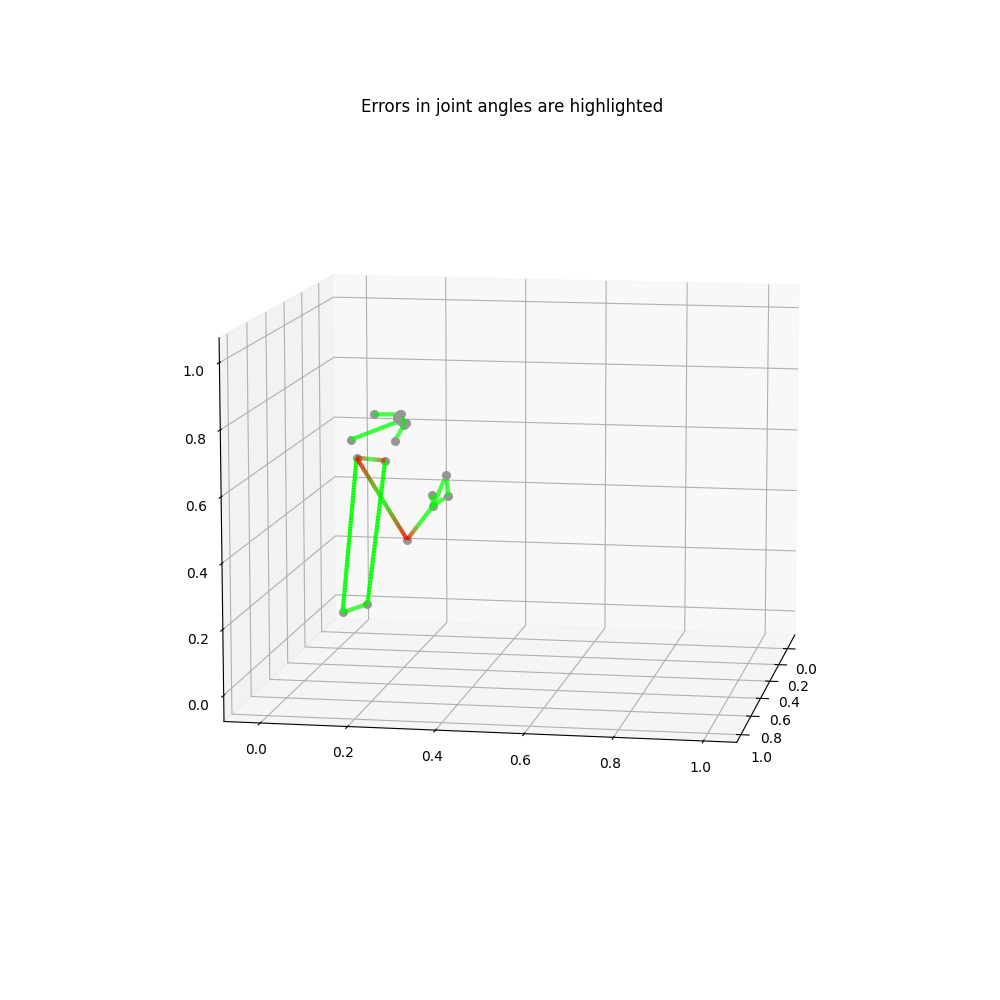

In [15]:
my_pose.calculate_angles()
ideal.calculate_angles()

ideal.plot_keypoints3d() #fig_title="IDEAL BODY POSITION")
my_pose.plot_keypoints3d() #fig_title="Test Body Position")
my_pose.draw3dErrorDetectedSkeleton(ideal,"Errors in joint angles are highlighted", pronounce_error_by=3,verbose=False)

In [16]:
arms_and_angles_diff = PoseHelper.calculate_angle_differences(
                    ideal.arms_and_angles, my_pose.arms_and_angles, 33
                )

In [17]:
suggestor = SuggestionBuilder()
print(suggestor.get_suggestions(arms_and_angles_diff,30))

BEND LEFT_SHOULDER MORE -95.82515664109545 [95.82515664109545, -6.737893820410327e-17, 1.0817145879707308e-16]
BEND RIGHT_SHOULDER MORE -268.457721258557 [-268.457721258557, -1.8562480636396532e-16, -1.0142160730136232e-16]
BEND LEFT_ELBOW LESS 209.4073452072542 [-209.4073452072542, -1.5156036709279555e-16, -1.1645381386048424e-16]
BEND RIGHT_ELBOW MORE -211.7368090038299 [-211.7368090038299, -1.6141016824448633e-16, -1.1337100335856283e-16]
BEND LEFT_HIP MORE -13.21853968042125 [13.21853968042125, -4.41357358288903e-16, -1.389464566635699e-17]
BEND RIGHT_HIP LESS 13.155629457693694 [13.155629457693694, -3.635553766339916e-16, -9.424741142740283e-18]
BEND LEFT_KNEE LESS 0.5169552240163274 [-0.5169552240163274, 2.3998717656293555e-16, -4.105250448947813e-18]
BEND RIGHT_KNEE MORE -1.0085762014508164 [-1.0085762014508164, 2.5889032029748136e-16, -4.7776686484246766e-18]



In [18]:
# print(my_pose.arms_and_angles)
# from math import pi
# import math

# for i in range(len(my_pose.arms_and_angles)):
#     if(my_pose.arms_and_angles[i]):
#         for arms,angle in my_pose.arms_and_angles[i].items():
#             arms = list(arms)
#             print(f"for joint {i}.{my_pose.mp_pose.PoseLandmark(i).name} between {arms[0]}.{my_pose.mp_pose.PoseLandmark(arms[0]).name}  & {arms[1]}.{arms[0]}.{my_pose.mp_pose.PoseLandmark(arms[1]).name} angle: {math.degrees(angle)} degrees")

[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {frozenset({<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.LEFT_ELBOW: 13>}): array([ 0.5583031,  0.       , -0.       ])}, {frozenset({<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.RIGHT_ELBOW: 14>}): array([-2.54399725,  0.        , -0.        ])}, {frozenset({<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_WRIST: 15>}): array([-1.82355905,  0.        , -0.        ])}, {frozenset({<PoseLandmark.RIGHT_WRIST: 16>, <PoseLandmark.RIGHT_SHOULDER: 12>}): array([-1.77855255,  0.        , -0.        ])}, {}, {}, {}, {}, {}, {}, {}, {}, {frozenset({<PoseLandmark.RIGHT_HIP: 24>, <PoseLandmark.LEFT_KNEE: 25>}): array([ 0.16776458,  0.        , -0.        ])}, {frozenset({<PoseLandmark.RIGHT_KNEE: 26>, <PoseLandmark.LEFT_HIP: 23>}): array([ 0.17777304,  0.        , -0.        ])}, {frozenset({<PoseLandmark.LEFT_ANKLE: 27>, <PoseLandmark.LEFT_HIP: 23>}): array([ 0.02518634,  0.        , -0.        ])}, {frozenset({<PoseLandmark.RIGHT_HIP: 24>,

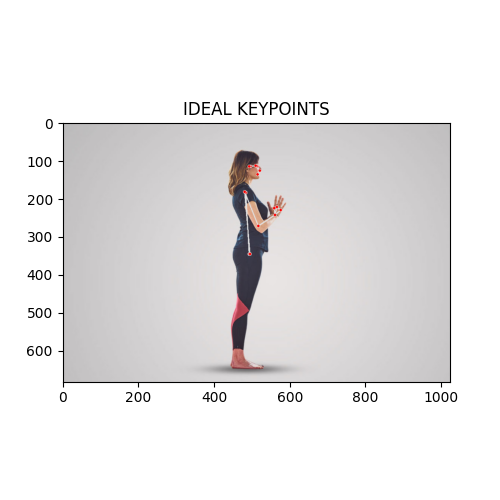

for joint 11.LEFT_SHOULDER between 12.RIGHT_SHOULDER  & 13.LEFT_ELBOW angle: [ 0.5583031  0.        -0.       ] radians
for joint 12.RIGHT_SHOULDER between 11.LEFT_SHOULDER  & 14.RIGHT_ELBOW angle: [-2.54399725  0.         -0.        ] radians
for joint 13.LEFT_ELBOW between 11.LEFT_SHOULDER  & 15.LEFT_WRIST angle: [-1.82355905  0.         -0.        ] radians
for joint 14.RIGHT_ELBOW between 16.RIGHT_WRIST  & 12.RIGHT_SHOULDER angle: [-1.77855255  0.         -0.        ] radians
for joint 23.LEFT_HIP between 24.RIGHT_HIP  & 25.LEFT_KNEE angle: [ 0.16776458  0.         -0.        ] radians
for joint 24.RIGHT_HIP between 26.RIGHT_KNEE  & 23.LEFT_HIP angle: [ 0.17777304  0.         -0.        ] radians
for joint 25.LEFT_KNEE between 27.LEFT_ANKLE  & 23.LEFT_HIP angle: [ 0.02518634  0.         -0.        ] radians
for joint 26.RIGHT_KNEE between 24.RIGHT_HIP  & 28.RIGHT_ANKLE angle: [ 0.01930166  0.         -0.        ] radians


In [19]:
print(ideal.arms_and_angles)
ideal.plot_keypoints2d(fig_title="IDEAL KEYPOINTS")
# ideal.detect_keypoints(verbose=True)
from math import pi
import math

multiplier = 1# 180/pi
for vertex in range(len(ideal.arms_and_angles)):
    if(ideal.arms_and_angles[vertex]):
        for arms,angle in ideal.arms_and_angles[vertex].items():
            arms = list(arms)
            print(f"for joint {vertex}.{ideal.mp_pose.PoseLandmark(vertex).name} between {arms[0]}.{ideal.mp_pose.PoseLandmark(arms[0]).name}  & {arms[1]}.{ideal.mp_pose.PoseLandmark(arms[1]).name} angle: {angle} radians")

In [20]:
# suggester = SuggestionBuilder(mp.solutions.pose)

TypeError: SuggestionBuilder.__init__() takes 1 positional argument but 2 were given

In [ ]:
# print(suggester.get_suggestions(arms_and_angles_diff,angle_error_threshold=angle_error_threshold))